# Data Exploration
## Data Description


In [1]:
import os
from tqdm import tqdm

data_dir = "./data/Alzheimer's MRI"
dirs = os.listdir(data_dir)
print(dirs)

['Test', 'Train']


In [2]:
train_dir = data_dir + '/Train'
test_dir = data_dir + '/Test'
class_names = os.listdir("./data/Alzheimer's MRI/Train")
print(class_names)

['Mild', 'Moderate', 'Non']


## Data Preprocessing and Augmentation
**DO NOT FORGET TO BACKUP ANY DATA BEFORE THIS PROCESS！**
Use function ImageDataGenerator to do data preprocessing.

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tqdm import tqdm

def augment_and_save_images(input_directory, output_directory, batch_size):
    # make sure there is a valid directory 
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    else:
        print("A dataset with the same name has existed!\n")# without doing so, there 
        choice = input("Input 1 to augment the dataset")
        if choice == "1":
            print("Data augmentation begins...\n")
        else:
            print("Process stop.")
            return None
    # define the image generator
    datagen = ImageDataGenerator(
        brightness_range=[0.8, 1.2],
        rotation_range=5,
        zoom_range=[0.99, 1.01],
        horizontal_flip=True,
        fill_mode="constant",
        data_format="channels_last"
    )

    # do the augmentation for each class
    for i, one_class in enumerate(os.listdir(input_directory)):
        if not os.path.exists(output_directory+ f'/{one_class}'):
            os.makedirs(output_directory+ f'/{one_class}')
        img_gen = datagen.flow_from_directory(
            input_directory,
            target_size = (224, 224),
            batch_size = batch_size,
            class_mode = 'categorical',
            classes = [one_class],
            save_to_dir = output_directory + f'/{one_class}',
            save_prefix = '',
            save_format = 'png'
      )
        for i in tqdm(range(len(img_gen))):
            batch_images = next(img_gen)
    print(f"Data augmentation completed and images have been saved in {output_directory}.")

# call the function and finish the augmentation
input_train = "./data/Alzheimer's MRI/Train"
output_train = "./data/aug_data_224/Train"
augment_and_save_images(input_train, output_train, 16)

A dataset with the same name has existed!


In [9]:
input_test = "./data/Alzheimer's MRI/Test"
output_test = "./data/aug_data_224/Test"
augment_and_save_images(input_test, output_test, 16)

Found 2240 images belonging to 1 classes.


100%|████████████████████████████████████████████████████████████████████████████████| 140/140 [00:30<00:00,  4.56it/s]


Found 948 images belonging to 1 classes.


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:13<00:00,  4.59it/s]


Found 3200 images belonging to 1 classes.


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:43<00:00,  4.59it/s]

Data augmentation completed and images have been saved in ./data/aug_data_224/Test.


## Calculate the average pixel density

In [1]:
import os, cv2
import numpy as np
from tqdm import tqdm
def mean_value(dir):
    class_names = os.listdir(dir)
    #create 3 list to store mean values of imgs in each class 
    mild = []
    moderate = []
    non = []
    for a_class in class_names:
        temp_dir = dir + '/' + a_class
        print(f'processing images in {temp_dir}:\n')
        for filename in tqdm(os.listdir(temp_dir)):
            image_path = os.path.join(temp_dir, filename)
            img_array = cv2.imread(image_path).astype(np.float32)
            pixel_value = img_array.sum(axis=(0, 1, 2))
            num_of_pixel = img_array.shape[0] * img_array.shape[1]
            mean_value =  pixel_value / num_of_pixel
            #mean_value = pixel_value
            #pixel normalization, 3 channels
            #mean_value =  mean_value / (255*3)
            if a_class == 'Mild':
                mild.append(mean_value)
            elif a_class == 'Moderate':
                moderate.append(mean_value)
            elif a_class == 'Non':
                non.append(mean_value)
    return mild, moderate, non
mild_train, moderate_train, non_train = mean_value("./data/Alzheimer's MRI/Train")
mild_test, moderate_test, non_test = mean_value("./data/Alzheimer's MRI/Test")



processing images in ./data/Alzheimer's MRI/Train/Mild:



100%|████████████████████████████████████████████████████████████████████████████| 8960/8960 [00:03<00:00, 2241.36it/s]


processing images in ./data/Alzheimer's MRI/Train/Moderate:



100%|██████████████████████████████████████████████████████████████████████████| 15424/15424 [00:06<00:00, 2230.70it/s]


processing images in ./data/Alzheimer's MRI/Train/Non:



100%|████████████████████████████████████████████████████████████████████████████| 9600/9600 [00:04<00:00, 2268.25it/s]


processing images in ./data/Alzheimer's MRI/Test/Mild:



100%|████████████████████████████████████████████████████████████████████████████| 2240/2240 [00:00<00:00, 3196.92it/s]


processing images in ./data/Alzheimer's MRI/Test/Moderate:



100%|██████████████████████████████████████████████████████████████████████████████| 948/948 [00:00<00:00, 3248.07it/s]


processing images in ./data/Alzheimer's MRI/Test/Non:



100%|████████████████████████████████████████████████████████████████████████████| 3200/3200 [00:00<00:00, 3258.42it/s]


# Print the distribution of average pixel density for each class 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def print_hist(mean_value_1,mean_value_2,mean_value_3):
    plt.figure(figsize=(6, 6))
    # If density is True, the weights are normalized, so that the integral of the density over the range remains 1.
    plt.hist(mean_value_1, bins=100, color='blue', alpha=0.6, density=True, label='Mild')
    plt.hist(mean_value_2, bins=100, color='green', alpha=0.6, density=True, label='Moderate')
    plt.hist(mean_value_3, bins=100, color='red', alpha=0.6, density=True, label='None')
    
    plt.xlabel('mean_value')
    plt.ylabel('Frequency(normalized)')
    plt.title('Mean value per pixel for 3 classes')
    plt.legend()
    plt.show()
#print('Training set\n')
#print_hist(mild_train, moderate_train, non_train)
#print('Test set\n')
#print_hist(mild_test, moderate_test, non_test)
#print_hist(mild,moderate,non)

# KStest

In [3]:
import scipy.stats as stats
def kstest(class_1,class_2,class_3):
    # class1 and class2
    #ks_statistic_1_2, p_value_1_2 = stats.ks_2samp(class_1, class_2,alternative='greater')
    ks_statistic_1_2, p_value_1_2 = stats.ks_2samp(class_1, class_2)
    # class1 and class3
    #ks_statistic_1_3, p_value_1_3 = stats.ks_2samp(class_1, class_3,alternative='less')
    ks_statistic_1_3, p_value_1_3 = stats.ks_2samp(class_1, class_3)
    # class3 and class2
    #ks_statistic_2_3, p_value_2_3 = stats.ks_2samp(class_2, class_3,alternative='less')
    ks_statistic_2_3, p_value_2_3 = stats.ks_2samp(class_2, class_3)
    
    print(f"Class 1 and 2\nKS_statistic_1_2：{ks_statistic_1_2}, p_value_1_2: {p_value_1_2},\n")
    print(f"Class 1 and 3\nKS_statistic_1_3: {ks_statistic_1_3}, p_value_1_3: {p_value_1_3},\n")
    print(f"Class 2 and 3\nKS_statistic_2_3: {ks_statistic_2_3}, p_value_2_3: {p_value_2_3}")


# The distribution of average pixel density for each class of the original dataset  

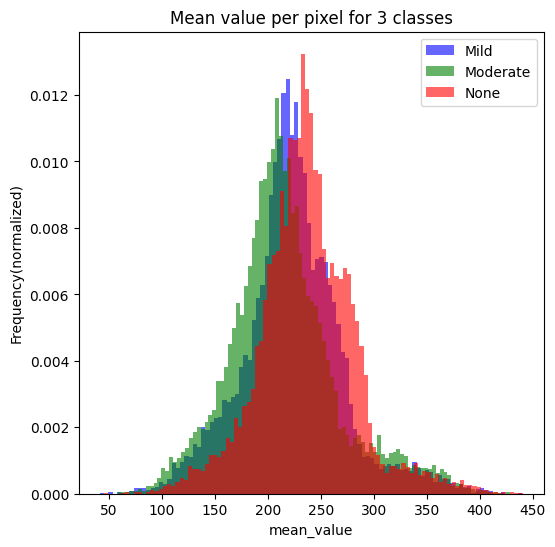

Class 1 and 2
KS_statistic_1_2：0.134245423370912, p_value_1_2: 5.6013681181776565e-105,

Class 1 and 3
KS_statistic_1_3: 0.16284598214285717, p_value_1_3: 7.152248201183916e-139,

Class 2 and 3
KS_statistic_2_3: 0.2743002916564867, p_value_2_3: 0.0


In [4]:
mild = mild_train+mild_test
moderate = moderate_train+moderate_test
non = non_train+non_test
print_hist(mild, moderate, non)
kstest(mild, moderate, non)

# The distribution of average pixel density for each class of the dataset after preprocess 

processing images in ./data/aug_data_224/Train/Mild:



100%|█████████████████████████████████████████████████████████████████████████████| 8960/8960 [00:11<00:00, 751.44it/s]


processing images in ./data/aug_data_224/Train/Moderate:



100%|███████████████████████████████████████████████████████████████████████████| 15424/15424 [00:21<00:00, 717.56it/s]


processing images in ./data/aug_data_224/Train/Non:



100%|█████████████████████████████████████████████████████████████████████████████| 9600/9600 [00:12<00:00, 740.33it/s]


processing images in ./data/aug_data_224/Test/Mild:



100%|█████████████████████████████████████████████████████████████████████████████| 2240/2240 [00:02<00:00, 770.33it/s]


processing images in ./data/aug_data_224/Test/Moderate:



100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:01<00:00, 779.41it/s]


processing images in ./data/aug_data_224/Test/Non:



100%|█████████████████████████████████████████████████████████████████████████████| 3200/3200 [00:04<00:00, 780.36it/s]


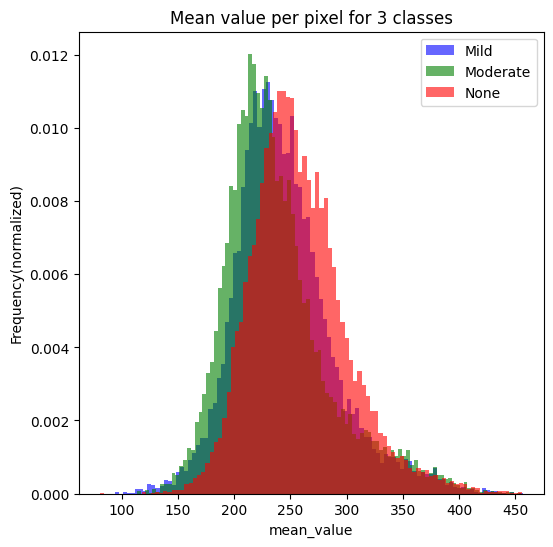

Class 1 and 2
KS_statistic_1_2：0.10370916372901468, p_value_1_2: 9.956288816571795e-63,

Class 1 and 3
KS_statistic_1_3: 0.1559486607142857, p_value_1_3: 2.484969404293947e-127,

Class 2 and 3
KS_statistic_2_3: 0.2551465153921329, p_value_2_3: 0.0


In [5]:
mild_train, moderate_train, non_train = mean_value("./data/aug_data_224/Train")
mild_test, moderate_test, non_test = mean_value("./data/aug_data_224/Test")
mild = mild_train+mild_test
moderate = moderate_train+moderate_test
non = non_train+non_test
print_hist(mild, moderate, non)
kstest(mild, moderate, non)